# Question 1

## Description

Read the Air Plaine image and calculate its histogram and then equalize the image and calculate and compare the histogram of the resulting image.

## Import required dependencies

- Import cv2 for read and map the color channels
- Import numpy to work with arrays
- Import matplotlib to show image for each step

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read Image

Read AirPlaine Image and map the color from bgr to rgb, because imread read image in bgr order 

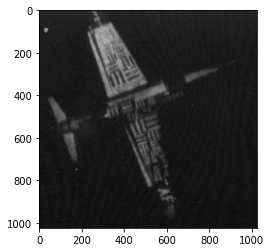

In [2]:
image = cv2.imread("../images/Airplane.tiff")

# Convert BGR order to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

## Define Histogram Function

Histogram is an array contains 256 item that each item is the count of the color in the image

In [3]:
def calcHist(image):
    histogram = np.zeros(256)

    for c in range(image.shape[2]):
        for h in range(image.shape[0]):
            for w in range(image.shape[1]):
                # Increase the number of color
                histogram[image[h, w, c]] += 1

    return histogram

## Calculate Histogram

Calculate histogram of the image, this method are too slow to use, i recommend use OpenCV method

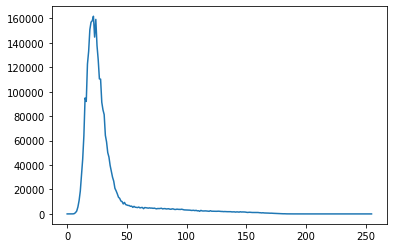

In [4]:
image_hist = calcHist(image)

plt.plot(image_hist)
plt.show()

## Calculate Histogram Using OpenCV

Calculate histogram of the image using OpenCV, this method are very faster than the numpy method or using for in python

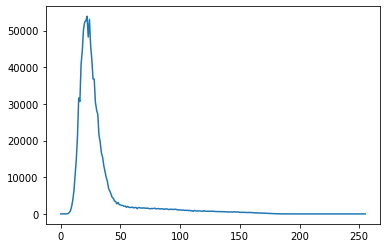

In [5]:
image_hist = cv2.calcHist([image],[0],None,[256],[0,256])

plt.plot(image_hist)
plt.show()

As result, both of the method have same output

## Equalized Image

Improve the contrast of the image in order to stretch out the intensity range

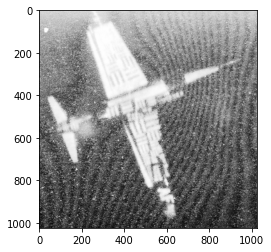

In [6]:
# Create copy from image
image_equalized = np.copy(image)

# Equalize each channel of image
for i in range(image_equalized.shape[2]):
    image_equalized[:, :, i] = cv2.equalizeHist(image_equalized[:, :, i])

plt.imshow(image_equalized)

make seems clearer, from the image above, you can see that the pixels seem clustered around the middle of the available range of intensities

## Calculate Equalized Histogram Using OpenCV

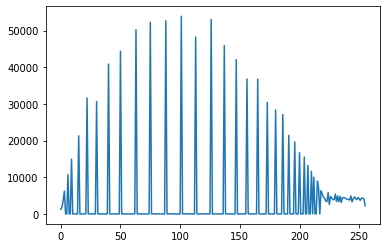

In [7]:
image_equalized_hist = cv2.calcHist([image_equalized], [0], None, [256], [0, 256])

plt.plot(image_equalized_hist)

As result, we undrestand the result have better contrast